In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File

In [2]:
nameCSV = 'melville_ACTUAL_FILEEE.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2998

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


## Make ndarray(alltime) and list(days2) that has dates

In [4]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [5]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

1.3633999824523926 1985-04-05 21:27:30.469790
1.3511250019073486 1985-04-14 09:26:31.513184
1.34530770778656 1985-05-07 11:06:14.088943
2.0326924324035645 1985-05-30 12:45:54.566106
1.6260000467300415 1985-06-02 12:54:42.804684
0.9227856993675232 1985-06-25 14:34:14.719868
1.345666766166687 1985-08-10 17:53:29.313367
2.313499927520752 1985-09-02 19:32:58.781247
2.4012999534606934 1985-09-05 19:41:45.054690
1.3407059907913208 1985-09-28 21:21:12.227023
0.32442858815193176 1985-10-16 11:10:26.379465
1.9190832376480105 1985-11-08 12:49:40.654948
1.4140626192092896 1985-11-14 00:39:52.969910
1.2756000757217407 1985-12-07 02:18:58.426560
0.5147500038146973 1986-01-19 17:56:10.249999
0.3118000030517578 1986-02-11 19:35:15.709374
0.5635000467300415 1986-03-12 09:03:50.362630
2.66937518119812 1986-04-04 10:42:45.532226
1.7990001440048218 1986-04-07 10:51:29.847656
0.3752500414848328 1986-04-27 12:21:35.900392
1.867833495140076 1986-04-30 12:30:16.296876
2.049000024795532 1986-05-20 14:00:18.82

0.7655625343322754 2004-08-02 18:47:09.222099
1.4286000728607178 2004-08-13 12:26:47.910937
1.285588264465332 2004-08-14 08:12:59.900668
0.5954000353813171 2004-08-19 00:11:18.644220
0.9700000286102296 2004-08-19 20:00:00.306985
2.7106001377105717 2004-08-31 09:25:56.132814
2.3844001293182373 2004-09-04 00:08:26.620300
0.9154286384582521 2004-09-05 21:12:53.240808
0.7155833244323729 2004-09-17 10:38:43.756510
0.8066666722297668 2004-09-17 12:26:45.434896
1.2523751258850098 2004-09-22 22:25:45.638541
0.8422727584838867 2004-09-23 00:11:14.748600
1.900800108909607 2004-10-04 11:51:33.414063
0.7501250505447388 2004-10-09 00:08:26.546583
1.0960588455200195 2004-10-09 23:38:35.137277
2.3106472492218018 2004-10-22 12:26:49.193749
1.3954167366027832 2004-10-27 00:51:22.408315
1.1577694416046145 2004-10-28 00:11:20.437500
0.7953571677207947 2004-11-13 02:04:11.851678
1.3372143507003784 2004-11-26 12:26:47.175294
1.0306665897369385 2004-11-30 03:17:01.882682
1.293000102043152 2004-12-02 00:11:1

2.376571655273437 2014-10-17 23:47:23.236980
1.3007059097290041 2014-10-19 10:15:08.741268
1.4014167785644531 2014-10-21 10:12:42.251302
1.5229412527645336 2014-10-23 09:52:01.532986
1.2428571156093051 2014-10-26 21:48:27.681986
0.9726666344536676 2014-10-27 21:45:55.611979
2.142750024795532 2014-10-28 21:46:00.539063
2.4620834986368814 2014-11-02 07:50:33.765623
2.2813892364501958 2014-11-06 19:44:27.723957
2.3363159581234583 2014-11-12 05:49:05.845052
1.5612942190731274 2014-11-15 08:52:29.350644
1.4766000747680663 2014-11-16 17:42:59.255209
1.7006471157073977 2014-11-17 08:50:03.224393
1.4096666971842449 2014-11-19 08:47:34.027344
1.0540770017183745 2014-11-22 03:47:37.298177
0.6091111501057943 2014-11-22 20:25:54.264757
0.686400032043457 2014-11-24 20:23:23.617188
1.945333480834961 2014-11-24 20:23:32.107423
3.0062224070231114 2014-11-26 15:41:31.092449
2.8501877784729004 2014-12-02 01:46:07.830729
1.7594001770019532 2014-12-02 07:07:41.007813
1.7032499313354492 2014-12-06 23:40:22

In [6]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


In [7]:
days2

[datetime.datetime(1985, 4, 5, 21, 27, 30, 469790),
 datetime.datetime(1985, 4, 14, 9, 26, 31, 513184),
 datetime.datetime(1985, 5, 7, 11, 6, 14, 88943),
 datetime.datetime(1985, 5, 30, 12, 45, 54, 566106),
 datetime.datetime(1985, 6, 2, 12, 54, 42, 804684),
 datetime.datetime(1985, 6, 25, 14, 34, 14, 719868),
 datetime.datetime(1985, 8, 10, 17, 53, 29, 313367),
 datetime.datetime(1985, 9, 2, 19, 32, 58, 781247),
 datetime.datetime(1985, 9, 5, 19, 41, 45, 54690),
 datetime.datetime(1985, 9, 28, 21, 21, 12, 227023),
 datetime.datetime(1985, 10, 16, 11, 10, 26, 379465),
 datetime.datetime(1985, 11, 8, 12, 49, 40, 654948),
 datetime.datetime(1985, 11, 14, 0, 39, 52, 969910),
 datetime.datetime(1985, 12, 7, 2, 18, 58, 426560),
 datetime.datetime(1986, 1, 19, 17, 56, 10, 249999),
 datetime.datetime(1986, 2, 11, 19, 35, 15, 709374),
 datetime.datetime(1986, 3, 12, 9, 3, 50, 362630),
 datetime.datetime(1986, 4, 4, 10, 42, 45, 532226),
 datetime.datetime(1986, 4, 7, 10, 51, 29, 847656),
 datet

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [8]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [9]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[5.1940376  5.56986478 5.31512902 ... 5.57214165 4.4818197  5.22972275]
2998 2998


In [10]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

2639
2639


In [11]:
dayswh

array([1.36339998, 1.351125  , 1.34530771, ..., 2.64020023, 1.34984618,
       0.8967273 ])

In [12]:
days_meanwh = np.mean(wh[days])
print days_meanwh

1.6590393571608488


In [15]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz})
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

,date,period,wh
0,1985-04-05 21:27:30.469790,5.194038,1.363400
1,1985-04-14 09:26:31.513184,5.569865,1.351125
2,1985-05-07 11:06:14.088943,5.315129,1.345308
3,1985-05-30 12:45:54.566106,6.179491,2.032692
4,1985-06-02 12:54:42.804684,5.682883,1.626000
5,1985-06-25 14:34:14.719868,4.322023,0.922786
6,1985-08-10 17:53:29.313367,5.121676,1.345667
7,1985-09-02 19:32:58.781247,5.294743,2.313500
8,1985-09-05 19:41:45.054690,5.488118,2.401300
9,1985-09-28 21:21:12.227023,4.629636,1.340706


In [16]:
print len(df.wh)
print len(df.date)

2639
2639


## Get rolling average wh based on 30 Days

In [17]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [18]:
yrolling

,date,period,wh
0,1985-04-05 21:27:30.469790,5.194038,1.363400
1,1985-04-14 09:26:31.513184,5.381951,1.357262
2,1985-05-07 11:06:14.088943,5.442497,1.348216
3,1985-05-30 12:45:54.566106,5.747310,1.689000
4,1985-06-02 12:54:42.804684,5.725834,1.668000
5,1985-06-25 14:34:14.719868,5.394799,1.527159
6,1985-08-10 17:53:29.313367,5.121676,1.345667
7,1985-09-02 19:32:58.781247,5.208209,1.829583
8,1985-09-05 19:41:45.054690,5.301512,2.020156
9,1985-09-28 21:21:12.227023,5.137499,2.018502


In [19]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

## Incorporate rolling average wh into dataframe

In [21]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling })
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,wh,wh_rolling
0,1985-04-05 21:27:30.469790,5.194038,5.194038,1.363400,1.363400
1,1985-04-14 09:26:31.513184,5.569865,5.381951,1.351125,1.357262
2,1985-05-07 11:06:14.088943,5.315129,5.442497,1.345308,1.348216
3,1985-05-30 12:45:54.566106,6.179491,5.747310,2.032692,1.689000
4,1985-06-02 12:54:42.804684,5.682883,5.725834,1.626000,1.668000
5,1985-06-25 14:34:14.719868,4.322023,5.394799,0.922786,1.527159
6,1985-08-10 17:53:29.313367,5.121676,5.121676,1.345667,1.345667
7,1985-09-02 19:32:58.781247,5.294743,5.208209,2.313500,1.829583
8,1985-09-05 19:41:45.054690,5.488118,5.301512,2.401300,2.020156
9,1985-09-28 21:21:12.227023,4.629636,5.137499,1.340706,2.018502


## Calculate Wave Power

### Wave Energy Flux
$P = ECg$

### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$



## Split into two, either side of date gap

In [22]:
print df.date[60]
print df.date[59]

1992-10-16 19:47:40.636160
1988-08-01 11:42:15.423958


In [23]:
#Period normal    
time1 = df.period[0:59]
time2 = df.period[60:-1]

#Period rolling
tt1 = df.period_rolling[0:59]
tt2 = df.period_rolling[60:-1]
        


#Hs normal
y1 = df.wh[0:59]
y2 = df.wh[60:-1]

#Hs rolling
yy1 = df.wh_rolling[0:59]
yy2 = df.wh_rolling[60:-1]


#Date
x1=df.date[0:59]
x2 = df.date[60:-1]

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


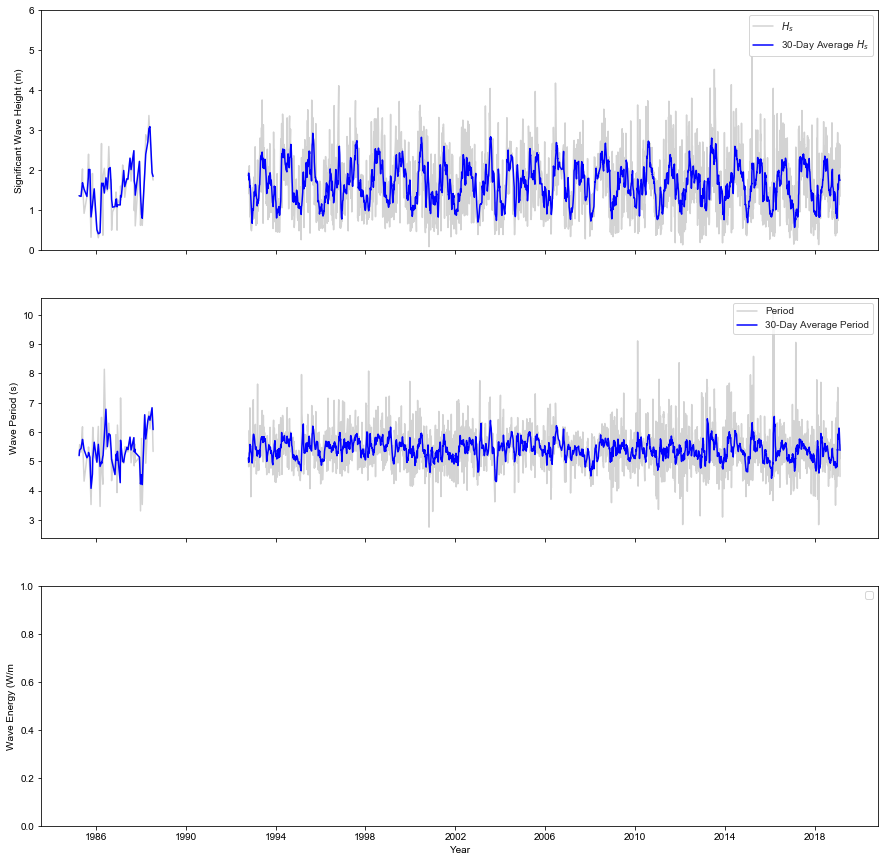

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    


sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
#ax3.plot(x1, time1)
#ax3.plot(x1,tt1)

#After date break
#ax3.plot(x2,time2)
#ax3.plot(x2,tt2)

ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (W/m") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')

plt.savefig("Melville_timeseries")